### Uvod:

Data su dva CSV fajla:
1. products.csv - sadrži identifikatore proizvoda i njihove opise
2. orders.csv - sadrži porudžbine jedne online prodavnice, zajedno sa identifikatorima porudžbine, proizvoda, kupca, datumom porudžbine, količinom i cenom, kao i zemljom porudžbine

### Zadaci:

Importuj pandas

In [379]:
import pandas as pd

Učitaj ```products.csv``` u DataFrame sa nazivom ```products_df```

In [380]:
products_df = pd.read_csv("data/products.csv")

Učitaj ```orders.csv``` u DataFrame sa nazivom ```orders_df```

In [381]:
orders_df = pd.read_csv("data/orders.csv")

Prikaži prvih 10 redova oba DataFrame-a:

In [382]:
products_df.head(10)

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
5,22752,SET 7 BABUSHKA NESTING BOXES
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,22633,HAND WARMER UNION JACK
8,22632,HAND WARMER RED POLKA DOT
9,84879,ASSORTED COLOUR BIRD ORNAMENT


In [383]:
orders_df.head(10)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Proveri koliko nedostajajućih vrednosti ima kolona ```Description``` u ```products_df``` DataFrame-u

In [384]:
print(products_df.info()) # broj entry-ja u indeksu (3685) - 3682 non null Description vrednosti = 3

# alternativa (ispiši redove sa nedostajućim vrednostima)

print(products_df[products_df["Description"].isna()])

# alternativa (izbroj redove sa nedostajućim vrednostima)

print(products_df["Description"].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    3685 non-null   object
 1   Description  3682 non-null   object
dtypes: object(2)
memory usage: 57.7+ KB
None
     StockCode Description
1418     21446         NaN
1496     11001         NaN
1624     20702         NaN
3


Popuni vrednosti koje nedostaju u ```Description``` koloni sa ```Missing Description```

In [385]:
products_df["Description"] = products_df["Description"].fillna("Missing Description")

Napravi novi orders_df spajajući ```orders_df``` i ```products_df``` da bi u novom DataFrame-u uz svaki proizvod iz porudžbine postojala informacija o opisu proizvoda

In [386]:
orders_df = pd.merge(
    orders_df, 
    products_df, 
    left_on="StockCode", 
    right_on="StockCode",
    how="left"
)

Napravi novu ```Total``` kolonu u okviru ```orders_df``` koja se dobija kao proizvod vrednosti ```Quantity``` i ```UnitPrice``` kolona

In [387]:
orders_df["Total"] = orders_df["Quantity"] * orders_df["UnitPrice"]

Sačuvaj novi ```order_df``` u fajl sa nazivom ```extended_orders.csv```

In [388]:
#orders_df.to_csv("extended_orders.csv")

Grupiši orders_df tako da dobiješ ukupnu zaradu po državi

In [389]:
profit_per_country_df = orders_df.groupby("Country")["Total"].sum()
profit_per_country_df

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     250285.220
European Community         1291.750
Finland                   22326.740
France                   196712.840
Germany                  221698.210
Greece                     4710.520
Iceland                    4310.000
Israel                     6994.250
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal                  29059.810
RSA                 

<Axes: title={'center': 'Total profit per country'}, xlabel='Total Profit', ylabel='Country'>

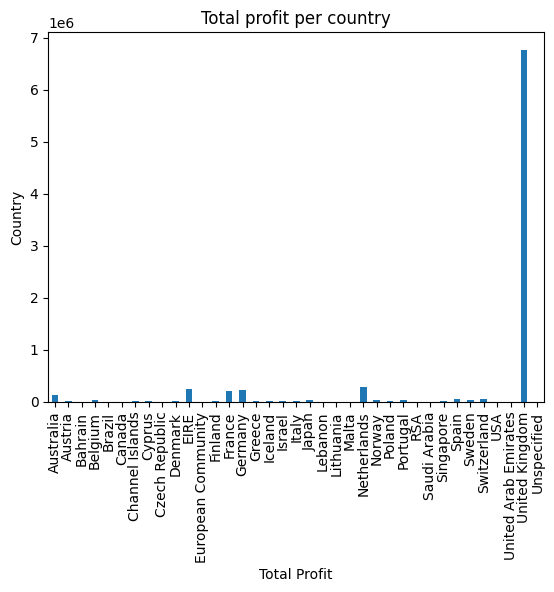

In [390]:
profit_per_country_df.plot.bar(
    x="Country",
    y="Total",
    title="Total profit per country",
    ylabel="Country",
    xlabel="Total Profit"
)

Prikaži rezultate na dijagramu. Stilizuj dijagram

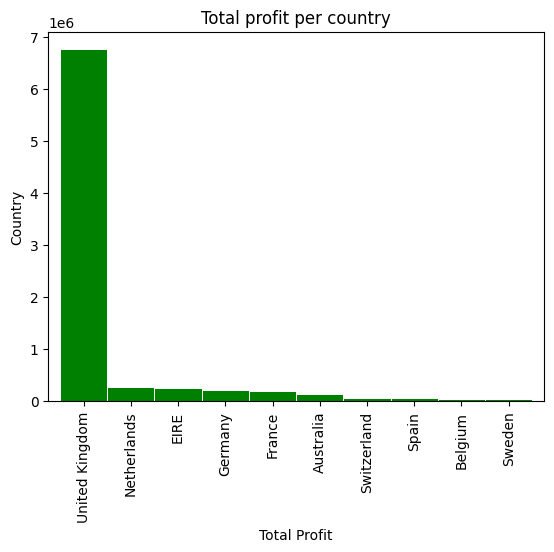

In [391]:
profit_per_country_df = profit_per_country_df.nlargest(10)
ax = profit_per_country_df.plot.bar(
    x="Country", 
    y="Total",
    title="Total profit per country",
    ylabel="Country",
    xlabel="Total Profit",
    color="green",
    width=1,
    edgecolor="white",
    linewidth=0.7
)